In [1]:
import pandas as pd 
import numpy as np
import random
import sys
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pickle
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_pickle("final_df.pkl")

In [5]:
df

,ticker,date,close,volume,calendardate,accoci,assets,assetsavg,assetsc,assetsnc,...,rating_cnt_mod_sells,rating_cnt_strong_sells,rating_mean_recom,rating_cnt_with,rating_cnt_without,rating_change,dcf,actualEarningResult,estimatedEarning,earnings_surprise
0,A,2019-02-20,78.56,2076523.0,2018-12-31,-381000000.0,8.952000e+09,8.656500e+09,3.712000e+09,5.240000e+09,...,0.0,0.0,1.1,10.0,0.0,0,84.948199,0.76,0.73,0.03
1,A,2019-02-21,77.89,3570828.0,2018-12-31,-381000000.0,8.952000e+09,8.656500e+09,3.712000e+09,5.240000e+09,...,0.0,0.0,1.1,10.0,0.0,0,84.278199,0.76,0.73,0.03
2,A,2019-02-22,78.42,2797669.0,2018-12-31,-381000000.0,8.952000e+09,8.656500e+09,3.712000e+09,5.240000e+09,...,0.0,0.0,1.1,10.0,0.0,1,84.808199,0.76,0.73,0.03
3,A,2019-02-25,79.34,1878041.0,2018-12-31,-381000000.0,8.952000e+09,8.656500e+09,3.712000e+09,5.240000e+09,...,0.0,0.0,1.1,10.0,0.0,0,85.728199,0.76,0.73,0.03
4,A,2019-02-26,78.55,1992595.0,2018-12-31,-381000000.0,8.952000e+09,8.656500e+09,3.712000e+09,5.240000e+09,...,0.0,0.0,1.1,10.0,0.0,0,84.938199,0.76,0.73,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081588,ZYXI,2021-02-23,18.07,646106.0,2020-12-31,0.0,7.217500e+07,5.178025e+07,6.302300e+07,9.152000e+06,...,0.0,0.0,2.0,6.0,0.0,0,19.232166,0.04,0.05,-0.01
1081589,ZYXI,2021-02-24,18.42,315802.0,2020-12-31,0.0,7.217500e+07,5.178025e+07,6.302300e+07,9.152000e+06,...,0.0,0.0,2.0,6.0,0.0,0,19.582166,0.04,0.05,-0.01
1081590,ZYXI,2021-02-25,17.42,388872.0,2020-12-31,0.0,7.217500e+07,5.178025e+07,6.302300e+07,9.152000e+06,...,0.0,0.0,2.3,6.0,0.0,1,18.524211,0.05,0.06,-0.01
1081591,ZYXI,2021-02-26,14.52,2337972.0,2020-12-31,0.0,7.217500e+07,5.178025e+07,6.302300e+07,9.152000e+06,...,0.0,0.0,2.3,6.0,0.0,0,15.624211,0.05,0.06,-0.01


In [6]:
one_hot_features = ['exchange', 'sector', 'industry']

In [7]:
for feature in one_hot_features:
    cat_X = df.loc[:, [feature]]
    ohe = OneHotEncoder(drop='first', sparse=False)
    ohe.fit(cat_X)
    ohe_X = ohe.transform(cat_X)
    columns = ohe.get_feature_names([feature])
    ohe_X_df = pd.DataFrame(ohe_X, columns=columns, index=cat_X.index)
    df = df.join(ohe_X_df)

In [8]:
df.ticker.nunique()

2888

In [9]:
df.ticker.nunique() * .2

577.6

In [10]:
import random

In [11]:
tickers = list(df.ticker.unique())
test_tickers = random.sample(tickers, int(df.ticker.nunique() * .2))

In [12]:
df_train = df[~df.ticker.isin(test_tickers)]

In [13]:
df_test = df[df.ticker.isin(test_tickers)]

In [14]:
print(len(df_train))
print(len(df_test))

865746
215847


In [15]:
df_train = df.sample(frac=1).reset_index(drop=True)

In [16]:
df_train

,ticker,date,close,volume,calendardate,accoci,assets,assetsavg,assetsc,assetsnc,...,industry_Travel Services,industry_Trucking,industry_Uranium,industry_Utilities - Diversified,industry_Utilities - Independent Power Producers,industry_Utilities - Regulated Electric,industry_Utilities - Regulated Gas,industry_Utilities - Regulated Water,industry_Utilities - Renewable,industry_Waste Management
0,OSIS,2020-11-19,85.43,62931.0,2020-09-30,-21681000.0,1.270948e+09,1.282002e+09,6.147930e+08,6.561550e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PRTK,2019-12-10,3.11,791446.0,2019-09-30,148000.0,2.527740e+08,2.754968e+08,2.451760e+08,7.598000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NWE,2019-09-05,73.73,381419.0,2019-06-30,-9733000.0,5.720435e+09,5.641391e+09,2.529940e+08,5.467441e+09,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NR,2020-05-18,2.08,1310129.0,2020-03-31,-75440000.0,8.668320e+08,9.035050e+08,4.507240e+08,4.161080e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FLS,2019-06-26,50.86,856807.0,2019-03-31,-566400000.0,4.846497e+09,4.679615e+09,2.436623e+09,2.409874e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081588,BKD,2019-03-07,6.56,2959157.0,2018-12-31,0.0,6.467260e+09,6.719743e+09,7.740160e+08,5.693244e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081589,NKE,2019-12-27,101.57,5307496.0,2019-09-30,180000000.0,2.624900e+10,2.389100e+10,1.622800e+10,1.002100e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081590,RWLK,2021-02-19,4.12,3405110.0,2020-12-31,0.0,2.806700e+07,2.555600e+07,2.524800e+07,2.819000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081591,AEIS,2021-02-23,103.89,426999.0,2020-12-31,-2605000.0,1.647662e+09,1.601745e+09,9.802490e+08,6.674130e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_train.drop([
 'ticker',
 'date',
 'calendardate',
 'name',
 'rating_cnt_strong_buys',
 'rating_cnt_mod_buys',
 'rating_cnt_holds',
 'rating_cnt_mod_sells',
 'rating_cnt_strong_sells',
 'rating_cnt_with',
 'rating_cnt_without',
 'rating_change',
 'quart',
 'year',
 'exchange',
 'sector',
 'industry'
 ], axis=1, inplace=True)

In [18]:
df_train

,close,volume,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,...,industry_Travel Services,industry_Trucking,industry_Uranium,industry_Utilities - Diversified,industry_Utilities - Independent Power Producers,industry_Utilities - Regulated Electric,industry_Utilities - Regulated Gas,industry_Utilities - Regulated Water,industry_Utilities - Renewable,industry_Waste Management
0,85.43,62931.0,-21681000.0,1.270948e+09,1.282002e+09,6.147930e+08,6.561550e+08,0.882,30.887,-2.258800e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.11,791446.0,148000.0,2.527740e+08,2.754968e+08,2.451760e+08,7.598000e+06,0.089,-1.246,-5.100000e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73.73,381419.0,-9733000.0,5.720435e+09,5.641391e+09,2.529940e+08,5.467441e+09,0.220,39.850,-3.144660e+08,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.08,1310129.0,-75440000.0,8.668320e+08,9.035050e+08,4.507240e+08,4.161080e+08,0.856,5.899,-1.835200e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.86,856807.0,-566400000.0,4.846497e+09,4.679615e+09,2.436623e+09,2.409874e+09,0.813,12.863,-7.495100e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081588,6.56,2959157.0,0.0,6.467260e+09,6.719743e+09,7.740160e+08,5.693244e+09,0.674,5.435,-2.254730e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081589,101.57,5307496.0,180000000.0,2.624900e+10,2.389100e+10,1.622800e+10,1.002100e+10,1.667,5.888,-1.059000e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081590,4.12,3405110.0,0.0,2.806700e+07,2.555600e+07,2.524800e+07,2.819000e+06,0.172,1.381,-7.300000e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081591,103.89,426999.0,-2605000.0,1.647662e+09,1.601745e+09,9.802490e+08,6.674130e+08,0.884,21.265,-3.636700e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_test.drop([
 'ticker',
 'date',
 'calendardate',
 'name',
 'rating_cnt_strong_buys',
 'rating_cnt_mod_buys',
 'rating_cnt_holds',
 'rating_cnt_mod_sells',
 'rating_cnt_strong_sells',
 'rating_cnt_with',
 'rating_cnt_without',
 'rating_change',
 'quart',
 'year',
 'exchange',
 'sector',
 'industry'
 ], axis=1, inplace=True)

/Users/dunleavyjason/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
x_train = df_train.copy()
del x_train["rating_mean_recom"]
y_train = df_train["rating_mean_recom"]

In [21]:
x_train

,close,volume,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,...,industry_Travel Services,industry_Trucking,industry_Uranium,industry_Utilities - Diversified,industry_Utilities - Independent Power Producers,industry_Utilities - Regulated Electric,industry_Utilities - Regulated Gas,industry_Utilities - Regulated Water,industry_Utilities - Renewable,industry_Waste Management
0,85.43,62931.0,-21681000.0,1.270948e+09,1.282002e+09,6.147930e+08,6.561550e+08,0.882,30.887,-2.258800e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.11,791446.0,148000.0,2.527740e+08,2.754968e+08,2.451760e+08,7.598000e+06,0.089,-1.246,-5.100000e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73.73,381419.0,-9733000.0,5.720435e+09,5.641391e+09,2.529940e+08,5.467441e+09,0.220,39.850,-3.144660e+08,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.08,1310129.0,-75440000.0,8.668320e+08,9.035050e+08,4.507240e+08,4.161080e+08,0.856,5.899,-1.835200e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.86,856807.0,-566400000.0,4.846497e+09,4.679615e+09,2.436623e+09,2.409874e+09,0.813,12.863,-7.495100e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081588,6.56,2959157.0,0.0,6.467260e+09,6.719743e+09,7.740160e+08,5.693244e+09,0.674,5.435,-2.254730e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081589,101.57,5307496.0,180000000.0,2.624900e+10,2.389100e+10,1.622800e+10,1.002100e+10,1.667,5.888,-1.059000e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081590,4.12,3405110.0,0.0,2.806700e+07,2.555600e+07,2.524800e+07,2.819000e+06,0.172,1.381,-7.300000e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081591,103.89,426999.0,-2605000.0,1.647662e+09,1.601745e+09,9.802490e+08,6.674130e+08,0.884,21.265,-3.636700e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
x_test = df_test.copy()
del x_test["rating_mean_recom"]
y_test = df_test["rating_mean_recom"]

In [23]:
ss = StandardScaler()

ss.fit(x_train)

x_train_scaled = ss.transform(x_train)

x_test_scaled = ss.transform(x_test)

In [25]:
import joblib
joblib.dump(ss, 'ss.joblib', compress=True)

['ss.joblib']

In [ ]:
x_train.shape

(1081593, 324)

In [ ]:
# instantiate model
model = keras.Sequential()

# add first layer to model. Defines the size of the input layer.

model.add(layers.InputLayer(input_shape=(324,)))

model.add(layers.Dense(1000,
                       activation='relu'))


model.add(layers.Dense(500,
                       activation='relu'))


model.add(layers.Dense(100,
                       activation='relu'))

model.add(layers.Dense(50,
                       activation='relu'))


model.add(layers.Dense(250,
                       activation='relu'))

model.add(layers.Dense(75,
                       activation='relu'))


model.add(layers.Dense(10,
                       activation='relu'))

#add output layer
model.add(layers.Dense(1))

#summmarize model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              325000    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 250)               12750     
_________________________________________________________________
dense_5 (Dense)              (None, 75)                18825     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7

In [ ]:
model.compile(optimizer='SGD', 
             loss='mae',       
             metrics=['mse'],  
             )

In [ ]:
history = model.fit(x_train_scaled, y_train,       
                    batch_size=1000,
                    epochs=500,             
                    validation_split=.2,
                    verbose=False,
                    callbacks=[keras.callbacks.ModelCheckpoint('models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
                                                               save_best_only=True)
       ])

In [ ]:
print(history.history)

{'loss': [0.765874981880188, 0.6472041010856628, 0.6137863993644714, 0.5856770277023315, 0.5634706020355225, 0.5423340201377869, 0.526660680770874, 0.5077334642410278, 0.4939134120941162, 0.47975826263427734, 0.4657292068004608, 0.4533155560493469, 0.4407593309879303, 0.43118906021118164, 0.41952499747276306, 0.40935882925987244, 0.39967671036720276, 0.39018023014068604, 0.3810470998287201, 0.3719545006752014, 0.36437568068504333, 0.3555302619934082, 0.34832897782325745, 0.3415500819683075, 0.3341538608074188, 0.3278047740459442, 0.3207487463951111, 0.31529679894447327, 0.30875858664512634, 0.3028877377510071, 0.2968295216560364, 0.29224011301994324, 0.2862434685230255, 0.28255733847618103, 0.27718695998191833, 0.271741658449173, 0.2680237293243408, 0.2628680169582367, 0.2595589756965637, 0.25599274039268494, 0.25244084000587463, 0.24863074719905853, 0.24544794857501984, 0.24194850027561188, 0.23855045437812805, 0.23598624765872955, 0.23317791521549225, 0.229558527469635, 0.22690065205

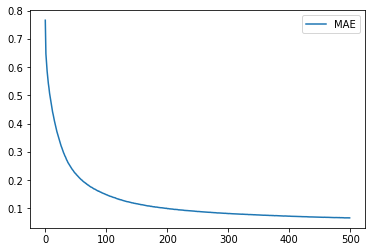

In [ ]:
fig, ax = plt.subplots()

mae = history.history['loss']

epochs = range(len(mae))

ax.plot(epochs, mae, label='MAE')

ax.legend();

In [ ]:
mae, mse = model.evaluate(x_train_scaled, y_train, verbose=False)

print(f'''MSE: {mse:.2f} \nMAE: {mae:.2f}''')

MSE: 0.06 
MAE: 0.07


In [ ]:
mae, mse = model.evaluate(x_test_scaled, y_test, verbose=False)

print(f'''MSE: {mse:.2f} \nMAE: {mae:.2f}''')

MSE: 0.07 
MAE: 0.07


In [ ]:
model.save('/content/drive/MyDrive/stock_rating/ann_model_9')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/stock_rating/ann_model_9/assets
